In [16]:
import pandas as pd

# Dataset from Kaggle: https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db
df = pd.read_csv('SpotifyFeatures.csv')

In [17]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df = df
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [24]:
df.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [27]:
df = df.dropna()
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

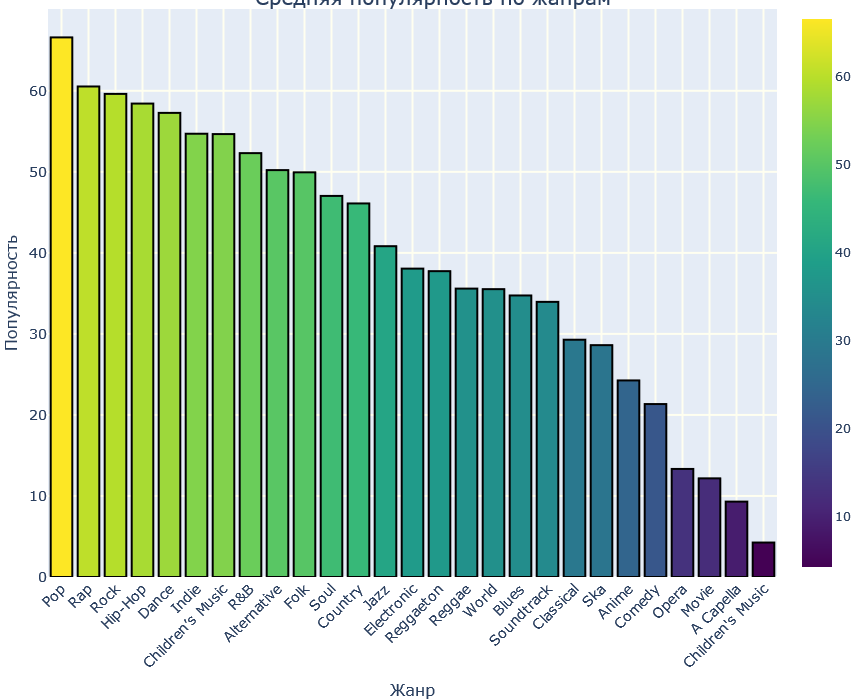

In [30]:
import plotly.graph_objs as go


# Группировка данных по жанру, и подсчет средней популярности
df_grouped = df.groupby('genre')['popularity'].mean().reset_index()

# Сортировка данных по популярности для наглядности
df_grouped = df_grouped.sort_values(by='popularity', ascending=False)

# Построение столбчатой диаграммы
bars = go.Bar(
    x=df_grouped['genre'], 
    y=df_grouped['popularity'], 
    marker=dict(
        color=df_grouped['popularity'],  # Цвет столбца зависит от популярности
        coloraxis="coloraxis",  # Цветовая шкала
        line=dict(color='black', width=2)  # Черная граница, толщина 2
    )
)

# Настройка макета
layout = go.Layout(
    title=dict(
        text='Средняя популярность по жанрам', 
        x=0.5,  # По центру
        font=dict(size=20)
    ),
    xaxis=dict(
        title='Жанр',
        tickangle=315,  # Поворот меток оси X
        titlefont=dict(size=16),
        tickfont=dict(size=14),
        showgrid=True,
        gridwidth=2,
        gridcolor='ivory',
    ),
    yaxis=dict(
        title='Популярность',
        titlefont=dict(size=16),
        tickfont=dict(size=14),
        showgrid=True,
        gridwidth=2,
        gridcolor='ivory',
    ),
    coloraxis=dict(
        colorscale='Viridis',  # Цветовая шкала
    ),
    width=1000,  # Ширина во всю область
    height=700,  # Высота 700 пикселей
    margin=dict(l=0, r=0, t=0, b=0)  # Убираем лишние отступы
)

# Создание фигуры
fig = go.Figure(data=[bars], layout=layout)

# Отображение графика
fig.show()


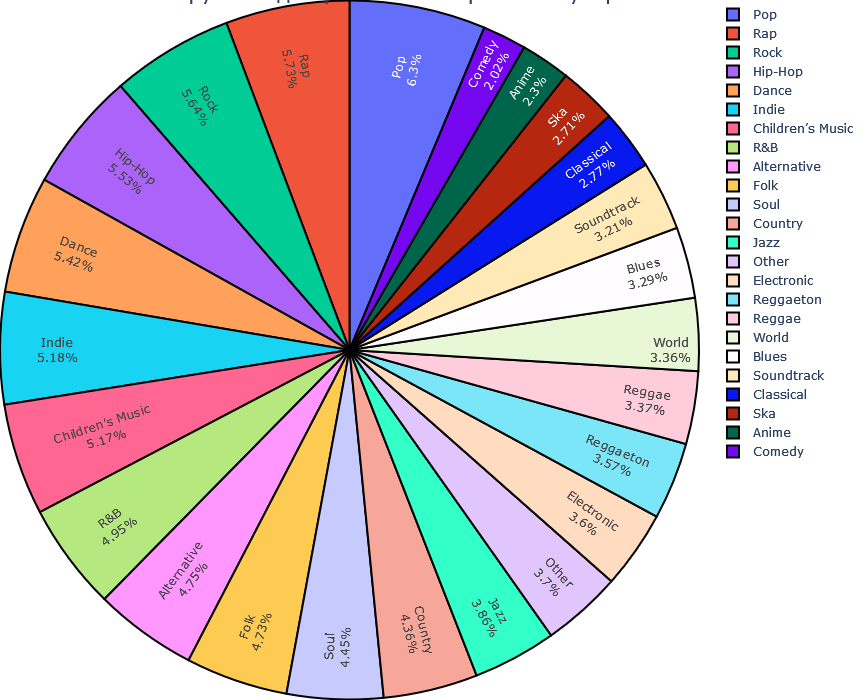

In [34]:
# Группировка данных по жанру, и подсчет средней популярности
df_grouped = df.groupby('genre')['popularity'].mean().reset_index()

# Сортировка данных по популярности для наглядности
df_grouped = df_grouped.sort_values(by='popularity', ascending=False)

# Объединение жанров с наименьшей популярностью (например, суммируем те, что меньше 2%)
threshold = 2  # Процент от общего количества
total_popularity = df_grouped['popularity'].sum()
df_grouped['percentage'] = (df_grouped['popularity'] / total_popularity) * 100

# Оставляем популярные жанры, а остальные объединяем
df_grouped_main = df_grouped[df_grouped['percentage'] > threshold]
df_grouped_other = df_grouped[df_grouped['percentage'] <= threshold]

# Добавляем категорию "Other" для менее популярных жанров
other_row = pd.DataFrame({
    'genre': ['Other'],
    'popularity': [df_grouped_other['popularity'].sum()],
    'percentage': [df_grouped_other['percentage'].sum()]
})

df_grouped_final = pd.concat([df_grouped_main, other_row])

# Построение круговой диаграммы
pie = go.Pie(
    labels=df_grouped_final['genre'],
    values=df_grouped_final['popularity'],
    marker=dict(
        line=dict(color='black', width=2)  # Черная граница с толщиной 2
    ),
    textinfo='label+percent',  # Отображение метки и процента
    insidetextorientation='radial',  # Чтение меток в круге
    hoverinfo='label+value+percent'  # Информация при наведении
)

# Настройка макета
layout = go.Layout(
    title=dict(
        text='Круговая диаграмма по жанрам с популярностью', 
        x=0.5,  # По центру
        font=dict(size=20)
    ),
    width=1000,  # Ширина во всю область
    height=700,  # Высота 700 пикселей
    margin=dict(l=0, r=0, t=0, b=0)  # Убираем лишние отступы
)

# Создание фигуры
fig = go.Figure(data=[pie], layout=layout)

# Отображение графика
fig.show()

In [37]:
from sklearn.manifold import TSNE
import plotly.express as px

# Извлечение только нужных признаков из датасета
X = df[features].values

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Добавляем результат t-SNE к исходному датафрейму для визуализации
df['tsne-2d-one'] = X_tsne[:, 0]
df['tsne-2d-two'] = X_tsne[:, 1]

# Построение визуализации с использованием Plotly
fig = px.scatter(
    df, 
    x='tsne-2d-one', 
    y='tsne-2d-two', 
    color='genre',  # Цвет по жанру, можно изменить на другой параметр
    title="Визуализация данных с использованием t-SNE",
    width=1000,
    height=700
)

# Отображение графика
fig.show()

KeyboardInterrupt: 